In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.svm import SVR

In [27]:
dataset = pd.read_csv('../placement.csv')
dataset.head(3)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25


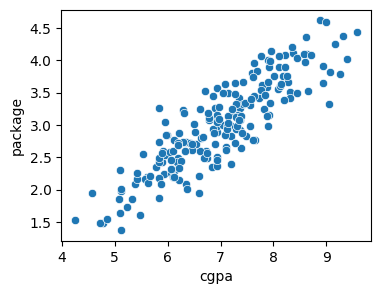

In [28]:
plt.figure(figsize=(4, 3))
sns.scatterplot(x='cgpa', y='package', data=dataset)
plt.show()

In [29]:
x = dataset.iloc[:, :-1]
y = dataset['package']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42)

In [31]:
bg = BaggingRegressor(estimator=SVR(), n_estimators=30)
bg.fit(x_train, y_train)

BaggingRegressor(estimator=SVR(), n_estimators=30)

In [32]:
bg.score(x_test, y_test)*100, bg.score(x_train, y_train)*100

(75.21405277596843, 81.24750552439532)

In [33]:
rf = RandomForestRegressor(n_estimators=30)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)*100, rf.score(x_train, y_train)*100

(69.97970637069318, 94.58311711521868)

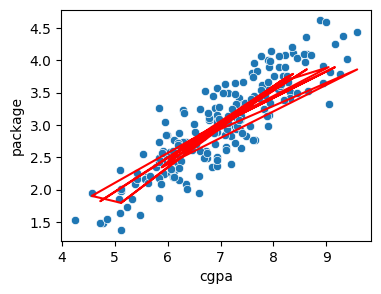

In [39]:
plt.figure(figsize=(4, 3))
sns.scatterplot(x='cgpa', y='package', data=dataset)
plt.plot(x_train, bg.predict(x_train), c='red')
plt.show()